In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
data = pd.read_csv('/content/weatherAUS.csv')
data.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [7]:
data.shape

(32897, 23)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32897 entries, 0 to 32896
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           32897 non-null  object 
 1   Location       32897 non-null  object 
 2   MinTemp        32398 non-null  float64
 3   MaxTemp        32527 non-null  float64
 4   Rainfall       32210 non-null  float64
 5   Evaporation    13825 non-null  float64
 6   Sunshine       9380 non-null   float64
 7   WindGustDir    28030 non-null  object 
 8   WindGustSpeed  28034 non-null  float64
 9   WindDir9am     28429 non-null  object 
 10  WindDir3pm     30797 non-null  object 
 11  WindSpeed9am   32068 non-null  float64
 12  WindSpeed3pm   31422 non-null  float64
 13  Humidity9am    32231 non-null  float64
 14  Humidity3pm    31567 non-null  float64
 15  Pressure9am    26213 non-null  float64
 16  Pressure3pm    26217 non-null  float64
 17  Cloud9am       17086 non-null  float64
 18  Cloud3

In [9]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [10]:
import plotly.express as px

In [11]:
def show_bar_singe(x, y, title=None):
    
    df = pd.DataFrame({'x': x, 'y': y})
    px.bar(
        df,
        x= 'x',
        y= 'y',
        text_auto='.s',
        color='x',
        title=title
    ).show()

In [12]:
def show_bar(data_sub):
    x = []
    y = []
    for name_col in data_sub.columns:
        if data_sub[name_col].isnull().sum() > 0:
            # print(f'{name_col}  has {data_sub[name_col].isnull().sum()} is null')
            x.append(name_col)
            y.append(data_sub[name_col].isnull().sum())
    df = pd.DataFrame({'x': x, 'y': y})
    px.bar(
        df,
        x= 'x',
        y= 'y',
        text_auto='.s',
        color='x'
    ).show()

In [13]:
data = data.drop(data[data.RainTomorrow.isnull()].index, axis=0)
data.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [14]:
# Show variable categorical
categorical = [var for var in data.columns if data[var].dtype=='O']
categorical

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [15]:
data[categorical]


,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No
...,...,...,...,...,...,...,...
32891,2015-10-06,Sydney,NNE,WNW,ENE,No,No
32892,2015-10-07,Sydney,SSW,SSE,SE,No,No
32893,2015-10-08,Sydney,ENE,ESE,E,No,No
32894,2015-10-09,Sydney,ENE,N,NE,No,No


In [16]:
data.Date = pd.to_datetime(data.Date)

In [17]:
data['week'] = data.Date.dt.weekday
data['month'] = data.Date.dt.month
data['year'] = data.Date.dt.year

In [18]:
data.drop('Date', inplace=True, axis=1)

In [19]:
data.head(5)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,week,month,year
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,0,12,2008
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,1,12,2008
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2,12,2008
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,3,12,2008
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,4,12,2008


In [20]:
number_var  = [var for var in data.columns if data[var].dtype != 'O']
number_var

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'week',
 'month',
 'year']

In [21]:
data[number_var]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,week,month,year
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,12,2008
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,1,12,2008
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,2,12,2008
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,3,12,2008
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,4,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32891,20.3,32.3,0.0,8.6,11.4,43.0,15.0,17.0,37.0,26.0,1023.2,1019.7,1.0,1.0,23.8,30.6,1,10,2015
32892,19.7,21.5,0.0,13.2,1.3,67.0,39.0,26.0,61.0,56.0,1029.6,1033.6,5.0,7.0,20.3,19.0,2,10,2015
32893,17.0,21.1,0.0,6.6,2.2,35.0,13.0,20.0,53.0,57.0,1038.8,1036.0,7.0,7.0,18.5,19.9,3,10,2015
32894,16.8,22.7,0.0,5.4,8.7,43.0,15.0,24.0,51.0,51.0,1034.4,1029.7,7.0,5.0,20.1,22.0,4,10,2015


In [22]:
def show_ourlies(data_sub):
    x = []
    y = []
    for name_col in data_sub.columns:
        desc  = data_sub[name_col].describe()
        
        iqr = desc['75%'] - desc['25%']
        lower_bound = desc['25%'] - 1.5 * iqr
        upper_bound = desc['75%'] + 1.5 * iqr
        outliers = data_sub[(data_sub[name_col] < lower_bound) | (data_sub[name_col] > upper_bound)]
        if len(outliers) > 0:
            x.append(name_col)
            y.append(len(outliers))

    show_bar_singe(x, y, title = "Statistic columns be Outlier")

In [23]:
show_ourlies(data[number_var])

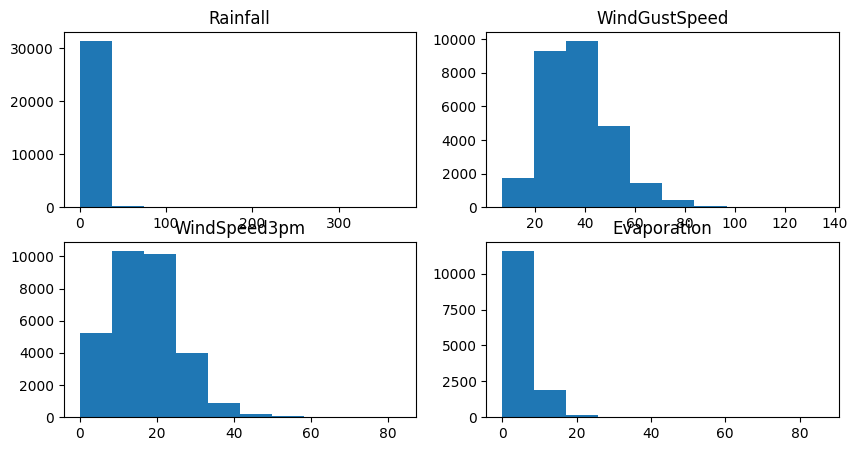

In [24]:
fig, ax = plt.subplots(2, 2, figsize=(10, 5))
ax = ax.flatten()
col = ['Rainfall', 'WindGustSpeed', 'WindSpeed3pm', 'Evaporation']

for i, name_col in enumerate(col):
    ax[i].hist(data[name_col], bins=10)
    ax[i].set_title(name_col)

plt.show()

In [25]:
show_bar(data)

In [26]:
data.Evaporation.value_counts()

4.0     584
3.4     435
3.0     416
3.8     387
3.2     383
       ... 
60.2      1
46.6      1
42.4      1
46.8      1
11.5      1
Name: Evaporation, Length: 261, dtype: int64

In [27]:
len(data)

32210

In [28]:
from scipy import stats

In [29]:
for name_col in data[number_var].columns:
    if data[name_col].isnull().sum() > 0:
        trimmed_mean = stats.trim_mean(data[name_col].value_counts().index, proportiontocut=0.2)
        data[name_col] = data[name_col].fillna(trimmed_mean)
        print(name_col)

MinTemp
MaxTemp
Rainfall
Evaporation
Sunshine
WindGustSpeed
WindSpeed9am
WindSpeed3pm
Humidity9am
Humidity3pm
Pressure9am
Pressure3pm
Cloud9am
Cloud3pm
Temp9am
Temp3pm


In [30]:
categorical = [x for x in categorical if x != 'Date']

In [31]:
show_bar(data[categorical])

In [32]:
data.dropna(inplace=True)

In [33]:
X = data.drop('RainTomorrow', axis=1)
y = data['RainTomorrow']

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [35]:
X_train.shape, X_test.shape

((19848, 24), (4962, 24))

In [36]:
data.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'week', 'month', 'year'],
      dtype='object')

In [39]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 9.1 MB/s eta 0:00:00


In [40]:
import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['RainToday'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [41]:
X_train = pd.concat([X_train[number_var], X_train[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_train.Location), 
                     pd.get_dummies(X_train.WindGustDir),
                     pd.get_dummies(X_train.WindDir9am),
                     pd.get_dummies(X_train.WindDir3pm)], axis=1)

In [42]:
X_test = pd.concat([X_test[number_var], X_test[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_test.Location), 
                     pd.get_dummies(X_test.WindGustDir),
                     pd.get_dummies(X_test.WindDir9am),
                     pd.get_dummies(X_test.WindDir3pm)], axis=1)

In [43]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
from sklearn.linear_model import  LogisticRegression

In [46]:
logreg = LogisticRegression(C=1, solver='liblinear', random_state=0)
logreg.fit(X_train, y_train)

LogisticRegression(C=1, random_state=0, solver='liblinear')

In [47]:
y_pred = logreg.predict(X_test)
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [48]:
from sklearn.metrics import accuracy_score
print(f'ACC = {accuracy_score(y_test, y_pred)}')

ACC = 0.8603385731559855


In [49]:
print(f'ACC TRAIN = {logreg.score(X_train, y_train)}')
print(f'ACC TEST = {logreg.score(X_test, y_test)}')

ACC TRAIN = 0.8533857315598549
ACC TEST = 0.8603385731559855
